In [ ]:
# import naming convention

import numpy as np
from numpy import newaxis
import pylab
from pylab import *
import timeit
import numpy.random as npr
import matplotlib.pyplot as plt
import math
from math import pow, ceil


In [ ]:
#NUMBER 1: REDUCTION EXERCISE

m = np.arange(12).reshape((3, 4))
print("Overall:", m.mean())
print("Row: ", m.mean(0))
print("Column: ", m.mean(1))


Overall: 5.5
Row:  [4. 5. 6. 7.]
Column:  [1.5 5.5 9.5]


In [ ]:
#NUMBER 2: OUTER PRODUCT EXERCISE


u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
print(u)
print(v)
print("Using the function outer in numpy:")
print(np.outer(u, v))
print("Using list or loop comprehension:")
print([m * n for m in u for n in v])
print("Using numpy broadcasting operations:")
print(u[:, newaxis] * v)


[1 3 5 7]
[2 4 6 8]
Using the function outer in numpy:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using list or loop comprehension:
[2, 4, 6, 8, 6, 12, 18, 24, 10, 20, 30, 40, 14, 28, 42, 56]
Using numpy broadcasting operations:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [ ]:
#NUMBER 3: MATRIX MASKING EXERCISE


matrix = 3 * npr.random_sample((10, 6)) - 0
print("10 * 6 Matrix of float random numbers, distributed between 0 and 3: ")
print(matrix)
arr = np.array(matrix)
mask = (matrix < 0.3)
print("Mask: \n", mask)
matrix[matrix < 0.3] = 0
print("\n All entries smaller than 3 set to zero using a mask: ")
print(matrix)


10 * 6 Matrix of float random numbers, distributed between 0 and 3: 
[[2.28409945 2.23378606 1.46360799 2.6982867  2.4445607  0.30999339]
 [1.58316246 0.1532732  0.4556529  1.88391885 1.78978793 0.67566189]
 [0.91553378 1.75573747 0.57074762 0.86614804 2.11531248 2.55459348]
 [0.4404014  0.39469702 2.94260512 0.4323417  2.57507488 2.30982589]
 [2.07802873 0.30716372 0.50472092 1.58471899 0.89239895 1.99692047]
 [2.58528142 0.30430012 2.65973169 1.83025092 0.75761791 0.86921965]
 [0.07583117 1.46696999 2.47087276 1.62710489 2.74389609 2.3503492 ]
 [2.17555371 0.71228478 0.56872481 0.02827533 1.16113466 1.88434497]
 [1.65789045 0.11032821 1.22617224 1.92458448 0.80077849 1.29107886]
 [1.09772518 0.57059986 2.7065895  1.7800947  1.75277651 2.85491782]]
Mask: 
 [[False False False False False False]
 [False  True False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False

A linear space containing 100 values between 0 and 2*pi (inclusive):
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.267

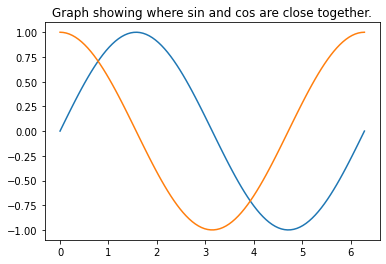

In [ ]:
#NUMBER 4: TRIGONOMETRIC FUNCTIONS EXERCISE

array = np.linspace(0, 2*math.pi, num=100)
print("A linear space containing 100 values between 0 and 2*pi (inclusive):\n", array)
print("\n Each 10th element was extracted using slice notation:\n", array[::10])
print("\n Slice notation was used to reverse the array:\n", array[::-1])
elements = np.abs(np.sin(array)-np.cos(array)) < 0.1
print("\n Elements where the absolute difference between "
      "the sin and cos functions is smaller than 0.1:\n", array[elements])
pylab.title("Graph showing where sin and cos are close together.")
pylab.plot(array, np.sin(array), array, np.cos(array))
pylab.show()


In [ ]:
#NUMBER 5: MATRICES EXERCISE

print("10 * 10 matrix multiplication table:")
mt = np.arange(1, 11)
m = mt[:, None] * mt[None, :]
print(m)
print("\n The trace of the matrix: ", m.trace())
print("\n The anti-diagonal matrix: ", np.flipud(m).diagonal())
print("\n The diagonal offset by 1 upwards: ", m.diagonal(offset=1))


10 * 10 matrix multiplication table:
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

 The trace of the matrix:  385

 The anti-diagonal matrix:  [10 18 24 28 30 30 28 24 18 10]

 The diagonal offset by 1 upwards:  [ 2  6 12 20 30 42 56 72 90]



 Distances between each city:
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

 This is converted from miles in: 
 [[   0.          318.65011315  487.63123376 1184.47718826 1401.73862905
  1890.97920681 2373.78240855 2484.82714495 3078.67508309 3939.67412619]
 [ 318.65011315    0.          168.98112061  865.82707512 1083.0885159
  1572.32909366 2055.1322954  2166.1770318  2760.02496994 3621.02401304]
 [ 487.63123376  168.98112061    0.          696.84595451  914.10739529
  1403.34797305 1886.15117479 1997.1959

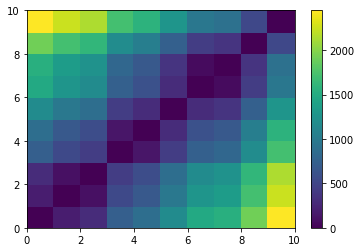

In [ ]:
#NUMBER 6: BROADCASTING EXERCISE

positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance = np.abs(positions - positions[:, np.newaxis])
print("\n Distances between each city:\n", distance)
plt.pcolor(distance)
plt.colorbar()
print("\n This is converted from miles in: \n", distance/0.62137119)


In [ ]:
#NUMBER 7: PRIME NUMBERS SIEVE EXERCISE

def sieve(n):
    N = [True for i in range(n+1)]
    N[1] = False
    primes = []
    for i in range(2, ceil(pow(n, 0.5))+1):
        if N[i]:
            for j in range(i*i, n+1, i):
                N[j] = False
    for i in range(2, n+1):
        if N[i]:
           primes.append(i)
    return primes

n = int(input("Enter N: \n"))
print(sieve(n))
print(timeit.timeit('sieve(n)', globals=globals(), number=99))



Enter N: 
25
[2, 3, 5, 7, 11, 13, 17, 19, 23]
0.0005849499993928475


[[ 1 -1 -1 ...  1  1 -1]
 [ 1 -1 -1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 ...
 [-1  1 -1 ... -1 -1 -1]
 [ 1 -1  1 ... -1  1 -1]
 [ 1 -1 -1 ...  1 -1  1]]

 [  4   2  -8 -14  -8  24 -12  28  16   2 -16  -6 -10  24   4   2  14   6
  -2  -8  -2   0 -18   4 -16  -8  12 -22   4 -22  18  12 -12 -12 -14   2
  10  14  22   0   6  18 -42  -2  -6   2 -10  14  14  -2 -10 -16   0  40
   2   0  20   8  -6 -14 -18  -4   2  10   2  -2  -2   6  -4   8  14   0
  -4   6  -6   6  20   4 -16  -2  18  18  20  -8   6  -8 -26  20 -16  -6
 -12  -6   2  -8   0 -18 -28  10  14  20 -12   0  10   2 -20 -18   2  16
  -6   6   2   0  -6   4  -2  -2   2  16  -4  10   2 -14   2   2  22 -12
 -10  12  36 -32  16 -10   8  -2 -24   8 -16  -6 -16 -10   6 -20   4  18
 -18  12  -6   8   6  20 -20  12  14  18  -8   8   8 -12  20  10  -8   0
 -18   6 -16 -52  24 -18  26   6   0   4 -12  28  10 -12   2  10   4  14
  12 -16   2   2 -32 -20  16   8   2  -8   0  10  14   0  10 -14   2 -28
 -20 -22   6 -12  10  14   6 -14  -8   

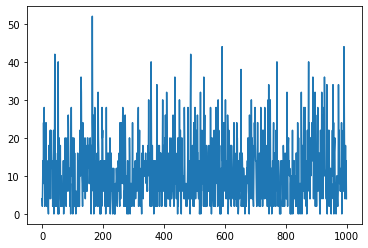

In [ ]:
#NUMBER 8: DIFFUSION USING RANDOM WALK EXERCISE

m = 2 * randint(0, 2, size=(1000, 200))-1
print(m)

w_d = m.sum(1)
print("\n", m.sum(1))

w_d_s = np.square(w_d)
print("\n", w_d_s)

m_d_s = []
mean = 0
for i in w_d_s:
    mean += i
    m_d_s.append(np.mean(mean))
print(m_d_s)

distances = np.sqrt(w_d_s)
m = np.arange(0, len(distances))
plt.plot(m, distances)
plt.show()
